## working principle:
    making text based detections using EasyOCR and Python
    visualize results using Open CV


step-0, installing and import dependencies

In [2]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.



In [3]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install easyocr --user


In [5]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [6]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np


## step-01, read in images or video

In [32]:
IMAGE_PATH='multiline.jpg'

In [33]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result[0]

Using CPU. Note: This module is much faster with a GPU.


([[148, 56], [461, 56], [461, 189], [148, 189]], 'SORRY', 0.8147378371834729)

In [34]:
result[3]

([[110, 422], [507, 422], [507, 556], [110, 556]],
 'SERVICE',
 0.9998544178110116)

## drwing results

In [37]:
top_left=tuple(result[0][0][0])
bottom_right= tuple(result[0][0][2])
text=result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX

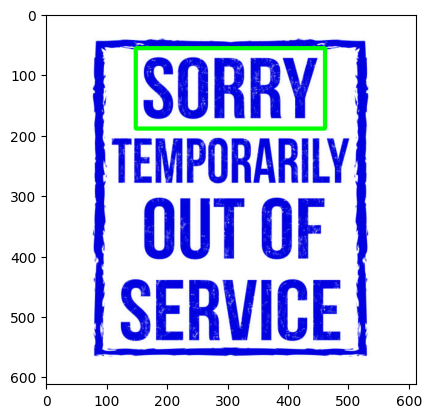

In [38]:
img= cv2.imread(IMAGE_PATH)
img=cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
plt.imshow(img)
plt.show()


## handling multiple lines

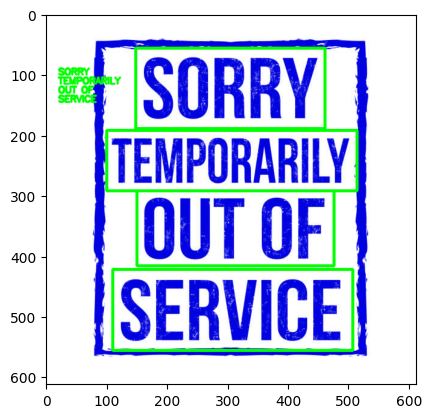

In [39]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()